In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.tardb as tardb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [3]:
from scipy.spatial import distance
from scipy import stats
import nilearn.plotting as niplot
import statsmodels.stats.multitest as smt

In [4]:
%matplotlib inline

In [5]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [6]:
affvids_db = tardb.FmriTarDataset('data/affvids2018_mc_zrest_norest.tar')

In [7]:
dtfa = DTFA.DeepTFA(affvids_db, num_factors=100, embedding_dim=2)

In [8]:
dtfa.load_state('data/affvids_norest_k100_n1000_05302020_174017') 

In [9]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

In [10]:
def block_task_labeler(block):
    return task_labeler(block['task'])

In [11]:
training_filter = affvids_db.inference_filter(training=True)
training_blocks = [b for (b, block) in dtfa._dataset.blocks.items() if training_filter(block)]

In [12]:
len(training_blocks)

688

In [13]:
validation_filter = affvids_db.inference_filter(training=False)
validation_blocks = [b for (b, block) in dtfa._dataset.blocks.items() if validation_filter(block)]

In [14]:
len(validation_blocks)

20

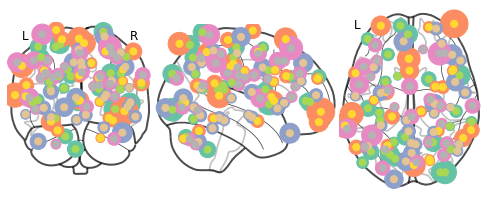

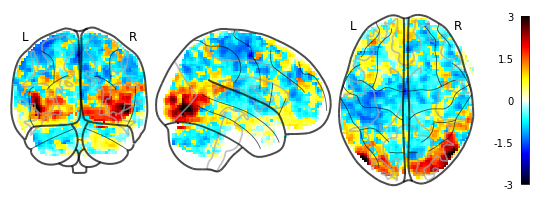

08/11/2021 11:35:17 Reconstruction Error (Frobenius Norm): 1.12784882e+02 out of 1.26233925e+02


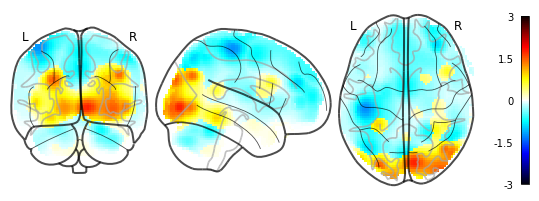

08/11/2021 11:35:20 Reconstruction Error (Frobenius Norm): 2.73231049e+02 out of 1.26233925e+02


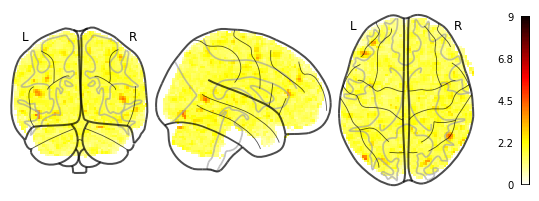

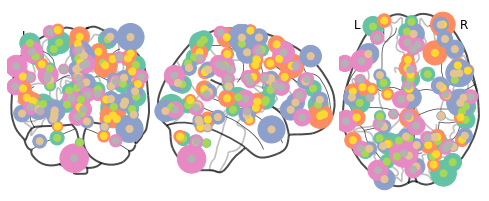

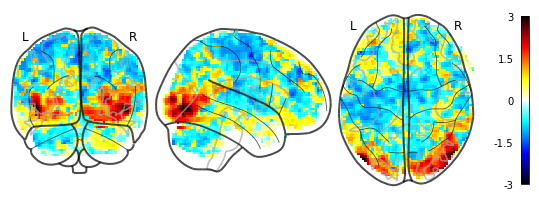

08/11/2021 11:35:26 Reconstruction Error (Frobenius Norm): 1.19240486e+02 out of 1.22972649e+02


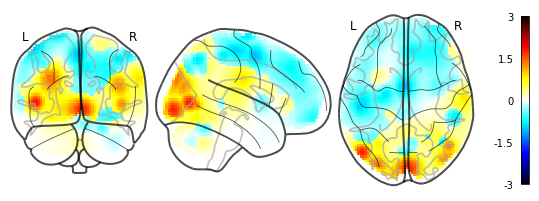

08/11/2021 11:35:28 Reconstruction Error (Frobenius Norm): 3.34486938e+02 out of 1.22972649e+02


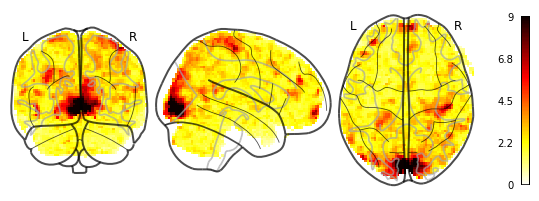

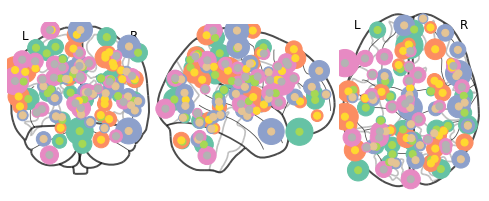

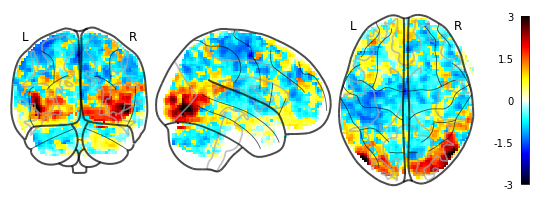

08/11/2021 11:35:35 Reconstruction Error (Frobenius Norm): 1.16225784e+02 out of 1.26233925e+02


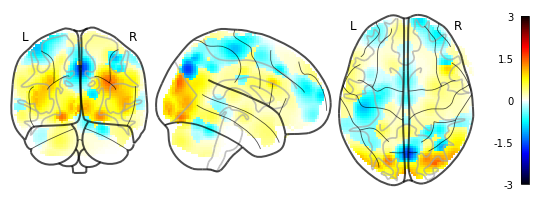

08/11/2021 11:35:38 Reconstruction Error (Frobenius Norm): 3.21428223e+02 out of 1.26233925e+02


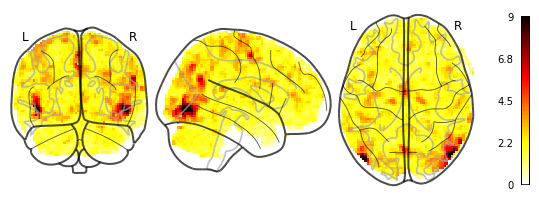

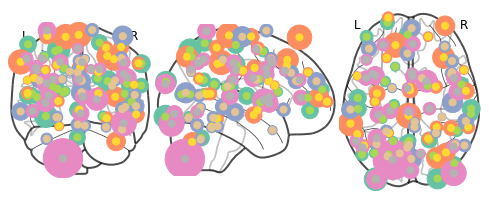

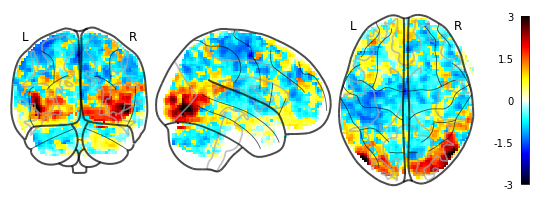

08/11/2021 11:35:44 Reconstruction Error (Frobenius Norm): 1.35441193e+02 out of 1.26233925e+02


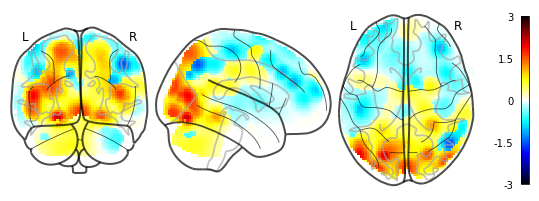

08/11/2021 11:35:47 Reconstruction Error (Frobenius Norm): 3.22199280e+02 out of 1.26233925e+02


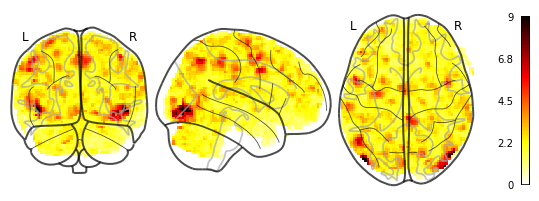

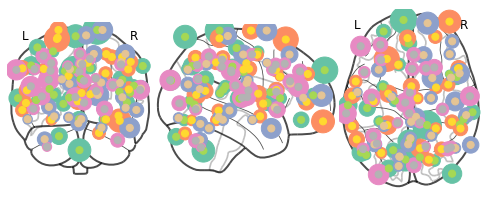

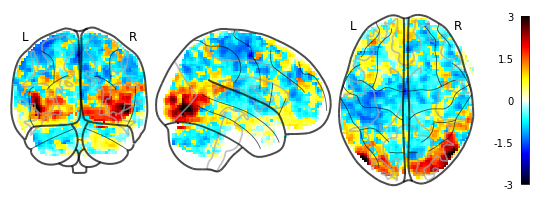

08/11/2021 11:35:53 Reconstruction Error (Frobenius Norm): 1.36217117e+02 out of 1.26233925e+02


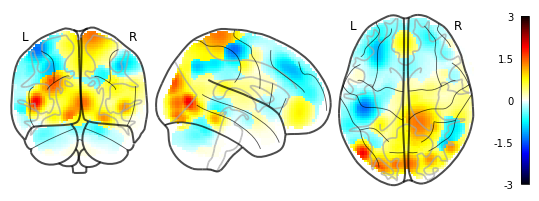

08/11/2021 11:35:56 Reconstruction Error (Frobenius Norm): 3.31765991e+02 out of 1.26233925e+02


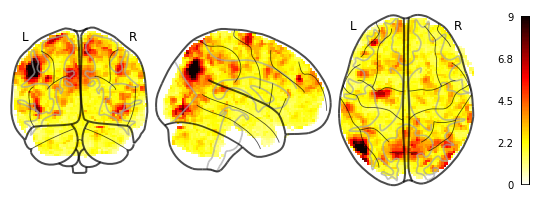

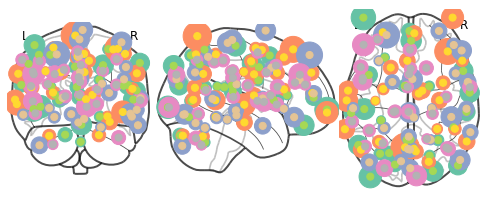

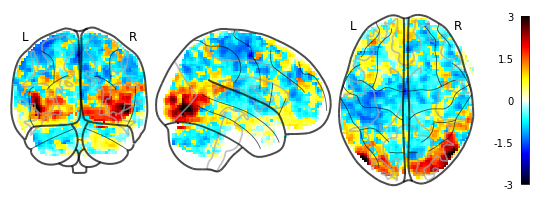

08/11/2021 11:36:03 Reconstruction Error (Frobenius Norm): 1.16398010e+02 out of 1.26233925e+02


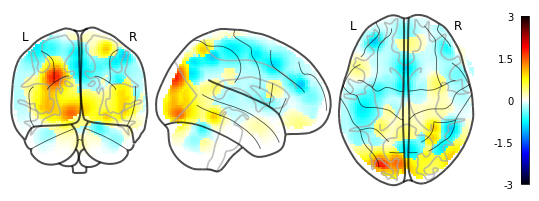

08/11/2021 11:36:05 Reconstruction Error (Frobenius Norm): 3.20826996e+02 out of 1.26233925e+02


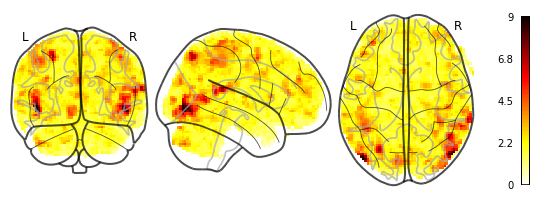

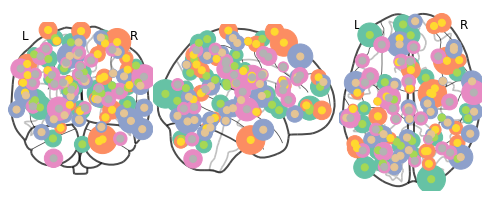

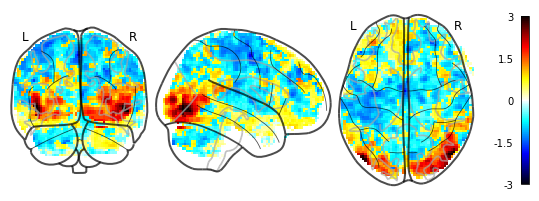

08/11/2021 11:36:12 Reconstruction Error (Frobenius Norm): 1.15710373e+02 out of 1.24525246e+02


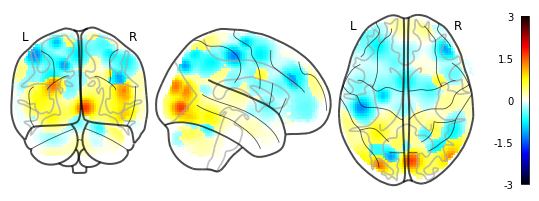

08/11/2021 11:36:14 Reconstruction Error (Frobenius Norm): 3.20550659e+02 out of 1.24525246e+02


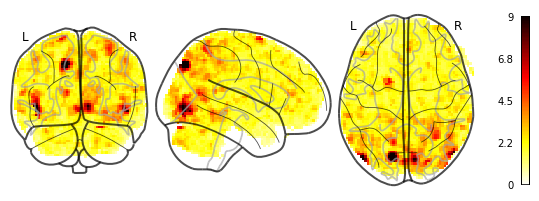

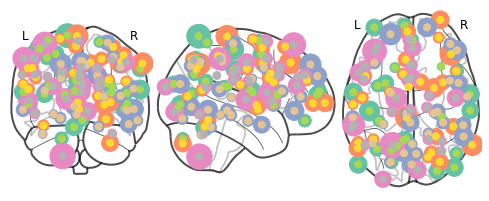

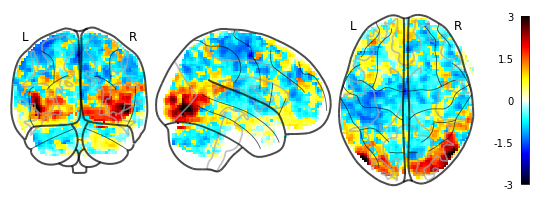

08/11/2021 11:36:21 Reconstruction Error (Frobenius Norm): 1.20782768e+02 out of 1.26233925e+02


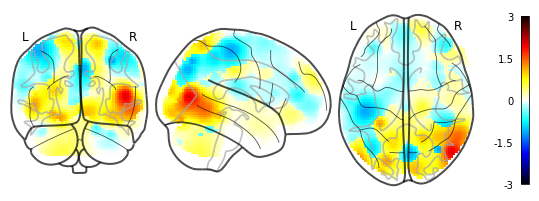

08/11/2021 11:36:23 Reconstruction Error (Frobenius Norm): 3.25413208e+02 out of 1.26233925e+02


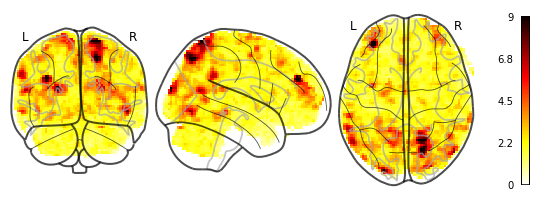

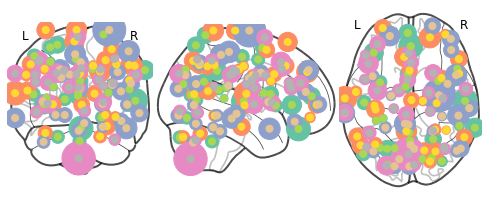

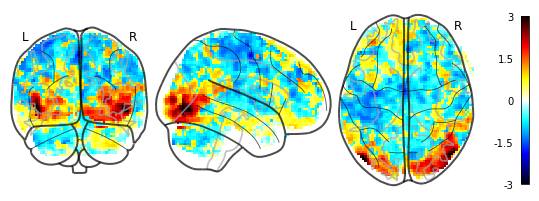

08/11/2021 11:36:30 Reconstruction Error (Frobenius Norm): 1.31500458e+02 out of 1.24986954e+02


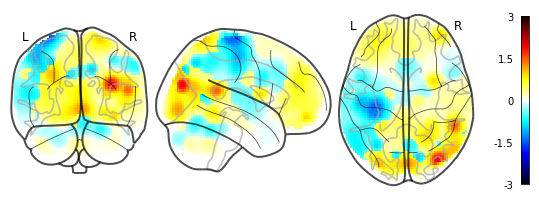

08/11/2021 11:36:32 Reconstruction Error (Frobenius Norm): 3.30235352e+02 out of 1.24986954e+02


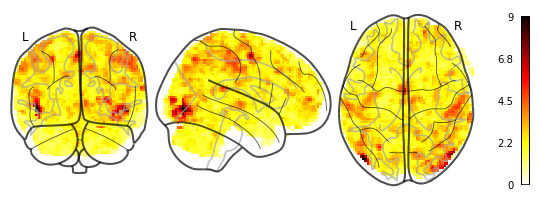

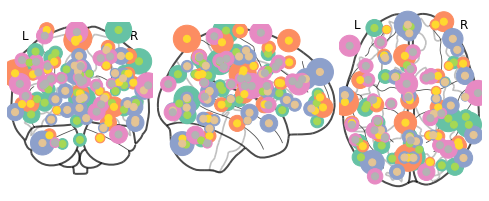

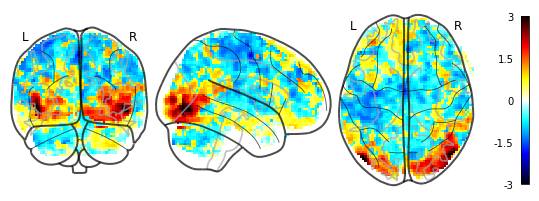

08/11/2021 11:36:39 Reconstruction Error (Frobenius Norm): 1.19450142e+02 out of 1.24986954e+02


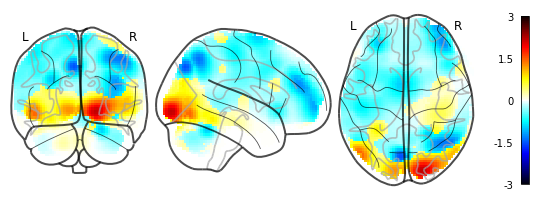

08/11/2021 11:36:41 Reconstruction Error (Frobenius Norm): 3.20791260e+02 out of 1.24986954e+02


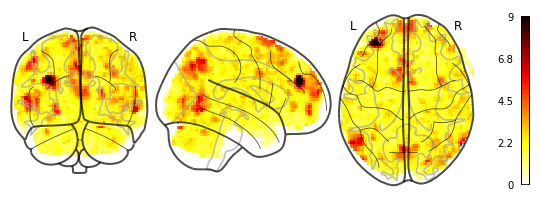

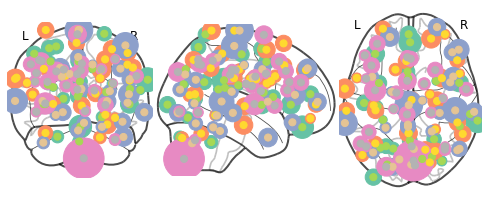

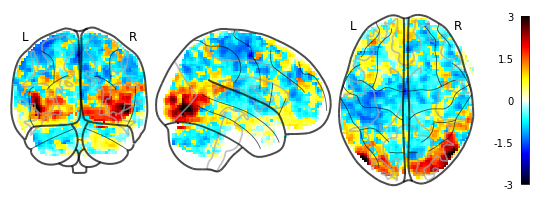

08/11/2021 11:36:48 Reconstruction Error (Frobenius Norm): 1.35709641e+02 out of 1.26233925e+02


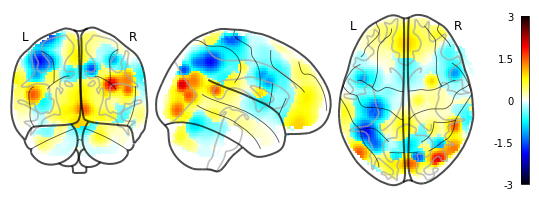

08/11/2021 11:36:51 Reconstruction Error (Frobenius Norm): 3.26960724e+02 out of 1.26233925e+02


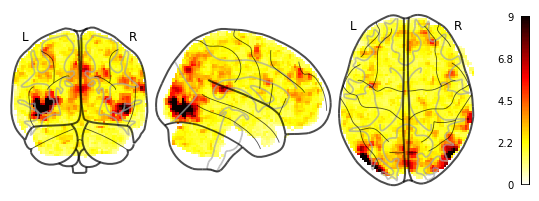

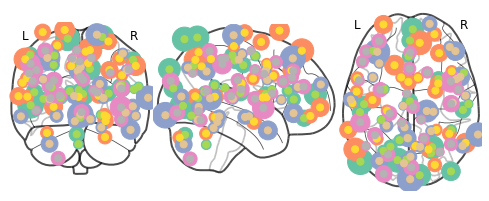

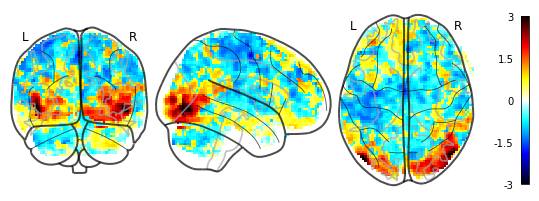

08/11/2021 11:36:57 Reconstruction Error (Frobenius Norm): 1.27766502e+02 out of 1.24986954e+02


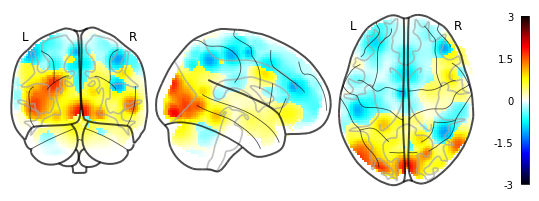

08/11/2021 11:37:00 Reconstruction Error (Frobenius Norm): 3.19228149e+02 out of 1.24986954e+02


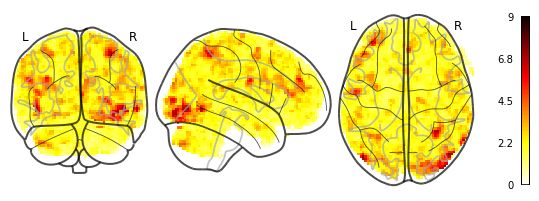

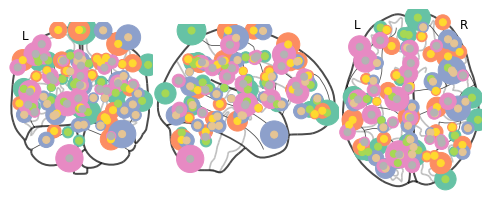

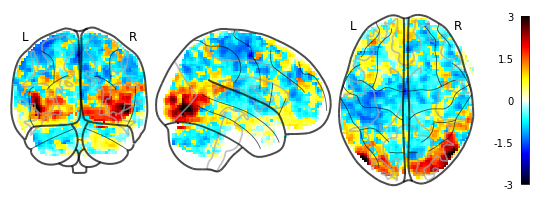

08/11/2021 11:37:06 Reconstruction Error (Frobenius Norm): 1.21540642e+02 out of 1.26233925e+02


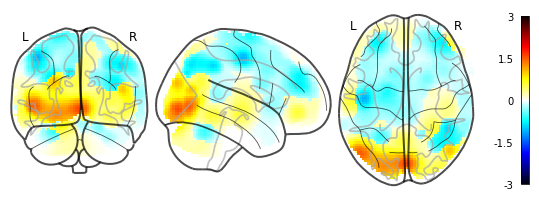

08/11/2021 11:37:09 Reconstruction Error (Frobenius Norm): 3.29817169e+02 out of 1.26233925e+02


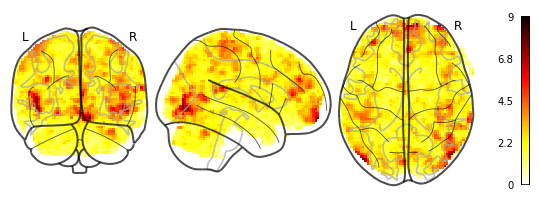

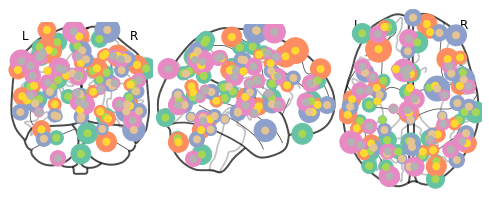

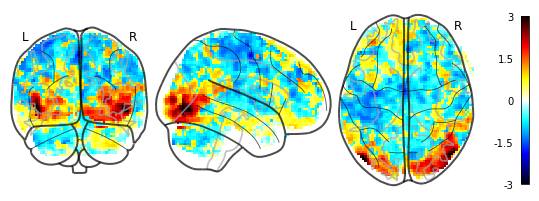

08/11/2021 11:37:15 Reconstruction Error (Frobenius Norm): 1.20716812e+02 out of 1.24986954e+02


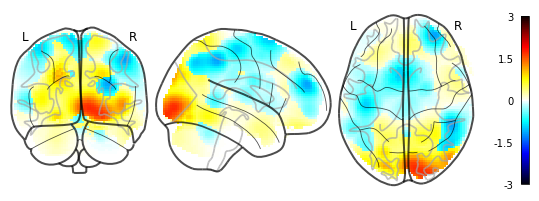

08/11/2021 11:37:17 Reconstruction Error (Frobenius Norm): 3.40074097e+02 out of 1.24986954e+02


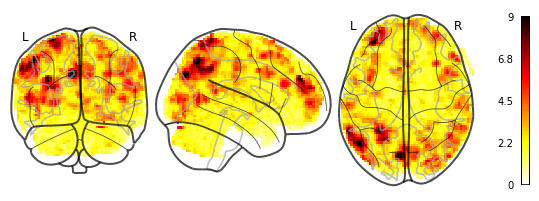

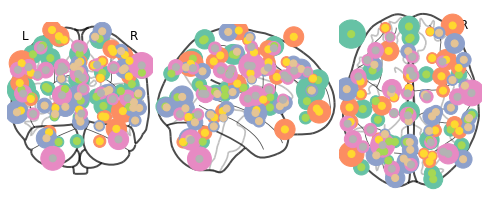

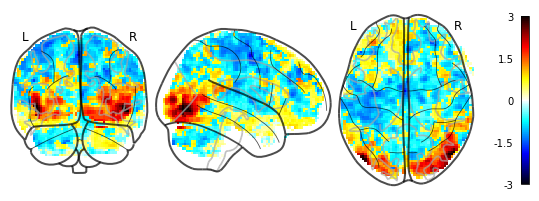

08/11/2021 11:37:23 Reconstruction Error (Frobenius Norm): 1.19223503e+02 out of 1.24525246e+02


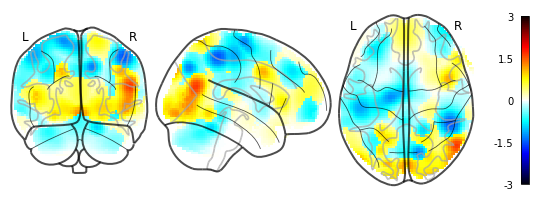

08/11/2021 11:37:26 Reconstruction Error (Frobenius Norm): 3.21941437e+02 out of 1.24525246e+02


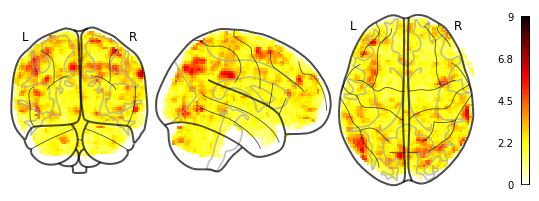

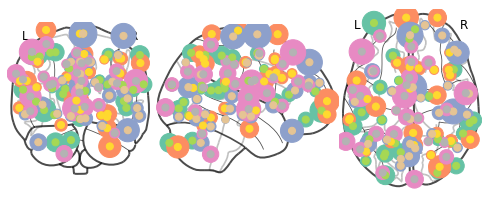

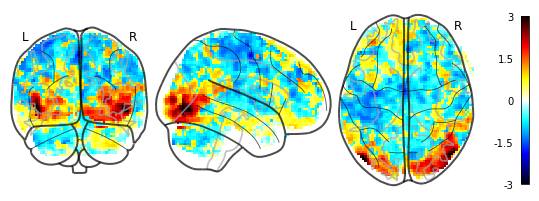

08/11/2021 11:37:32 Reconstruction Error (Frobenius Norm): 1.29157883e+02 out of 1.24986954e+02


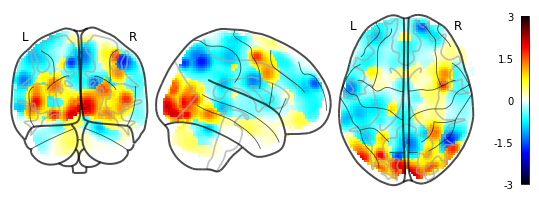

08/11/2021 11:37:35 Reconstruction Error (Frobenius Norm): 3.28888580e+02 out of 1.24986954e+02


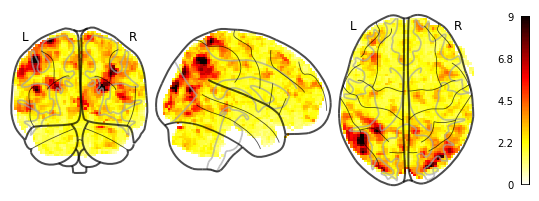

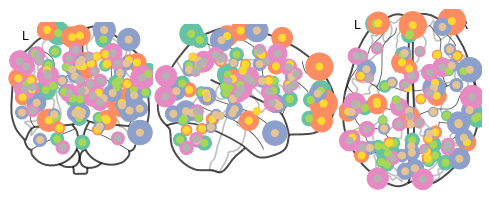

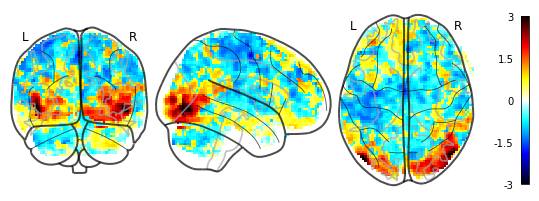

08/11/2021 11:37:41 Reconstruction Error (Frobenius Norm): 1.38843491e+02 out of 1.24986954e+02


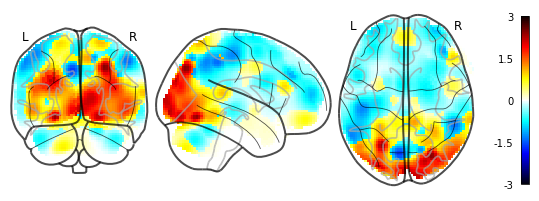

08/11/2021 11:37:44 Reconstruction Error (Frobenius Norm): 3.52712250e+02 out of 1.24986954e+02


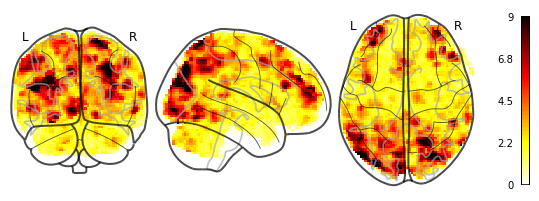

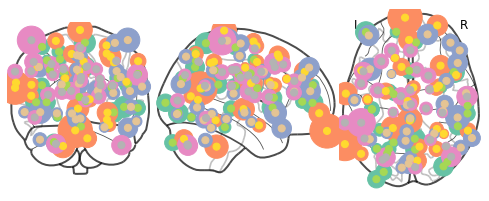

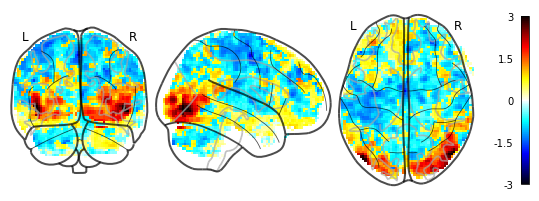

08/11/2021 11:37:50 Reconstruction Error (Frobenius Norm): 1.24188507e+02 out of 1.24525246e+02


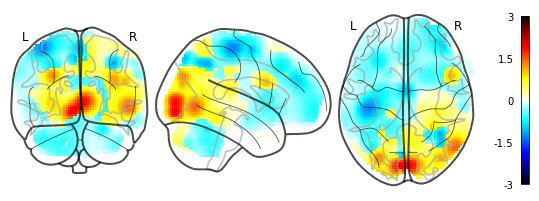

08/11/2021 11:37:52 Reconstruction Error (Frobenius Norm): 3.18333374e+02 out of 1.24525246e+02


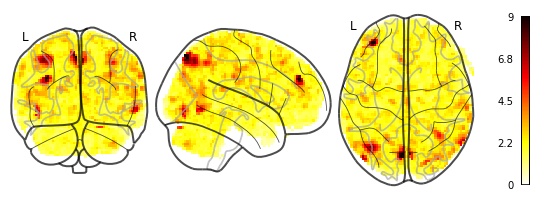

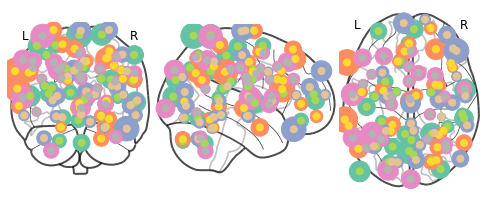

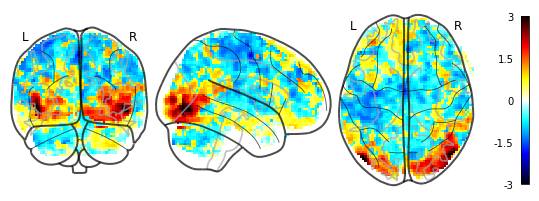

08/11/2021 11:37:59 Reconstruction Error (Frobenius Norm): 1.17608467e+02 out of 1.24986954e+02


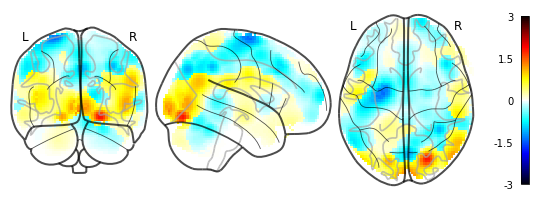

08/11/2021 11:38:01 Reconstruction Error (Frobenius Norm): 3.15770172e+02 out of 1.24986954e+02


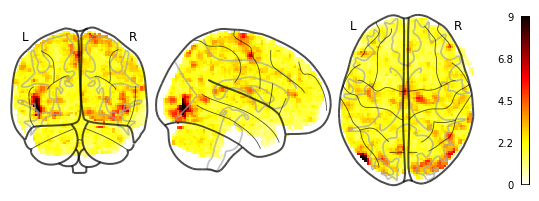

In [15]:
for index in validation_blocks[0:-1:1]:
    dtfa.plot_factor_centers(index)
    dtfa.plot_original_brain(index, labeler=lambda b: None, t=None)
    dtfa.plot_reconstruction(index, labeler=lambda b: None, t=None)
    dtfa.plot_reconstruction_diff(index, labeler=lambda b: None, t=None)

In [16]:
dtfa.free_energy(batch_size=128, use_cuda=False, blocks_filter=affvids_db.inference_filter(training=True))

[[51426848768.0, -51421196288.0, 5653208.5],
 [51448606720.0, -51407142912.0, 5654972.0]]

In [17]:
dtfa.free_energy(batch_size=128, use_cuda=False, blocks_filter=affvids_db.inference_filter(training=False))

[[1447048448.0, -1446881024.0, 167153.640625],
 [1447132672.0, -1446721920.0, 167287.578125]]

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


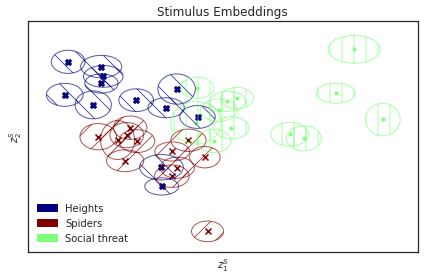

In [18]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='jet',
                            filename='affvids_norest_task_embedding.pdf')

In [19]:
def subject_labeler(subject):
    return 'Subject %d' % subject

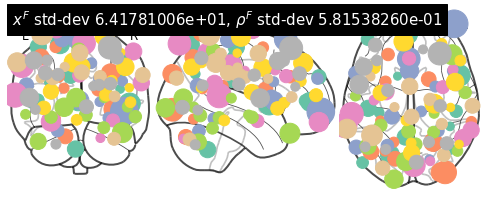

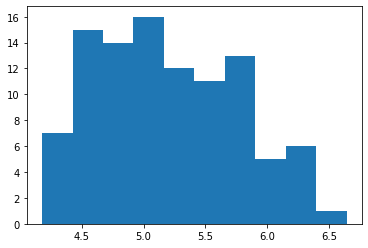

(<nilearn.plotting.displays.OrthoProjector at 0x7f4b18e60c90>,
 tensor([[-3.2397e+01, -2.9571e+01,  2.4839e+01],
         [ 4.8549e+01, -2.8006e+01,  5.1200e+01],
         [ 4.2031e+01, -4.3895e+01,  1.7492e+01],
         [-2.1616e+00,  5.2819e+01,  4.5120e+00],
         [-1.3068e+01,  8.8967e+00,  3.7751e+01],
         [-2.1161e+01, -7.3699e+01,  6.4485e+01],
         [-4.9342e+00, -5.5124e+01, -4.5752e+01],
         [ 4.2994e+01, -6.8121e+01,  3.3820e+01],
         [-4.9871e+01, -8.1977e+01,  3.1357e+00],
         [ 5.2066e+01,  9.6650e+00,  1.9350e+00],
         [-4.4051e+01, -2.4936e+01,  6.1867e+01],
         [-4.4595e+01,  4.7970e+01,  5.5669e+00],
         [-1.0190e+01,  6.1971e+01,  3.0804e+01],
         [ 1.9692e+01,  5.7532e+00,  1.7576e+01],
         [-2.6182e+01, -6.9887e+01, -1.3519e+01],
         [-1.7019e+01, -6.0509e+01,  1.8287e+01],
         [-2.5816e+01,  3.0837e+00,  6.1663e+01],
         [ 3.6949e+01, -9.2293e+01, -3.8036e+00],
         [-3.1262e+01, -3.7731e+01,  

In [20]:
dtfa.visualize_factor_embedding()

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


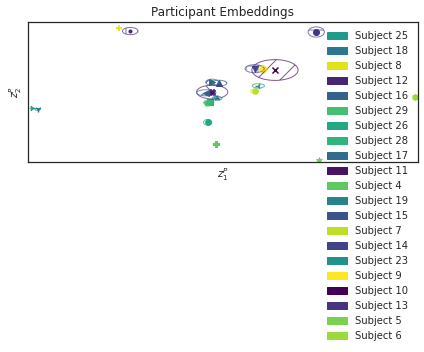

In [21]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

In [33]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._dataset.blocks.values():
        if subject_labeler(b['subject']) == subject_label and task_labeler(b['task']) == task_label:
            yield b

In [34]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._dataset.blocks.values():
        if subject_labeler(b['subject']) == subject_label:
            yield b

In [24]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b['individual_differences']['fear_rating']:
            yield b['individual_differences']['fear_rating']

In [25]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b['individual_differences']['fear_rating']:
            yield b['individual_differences']['fear_rating']

In [26]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [27]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [28]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [29]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

In [30]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

In [31]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/dtfa.py:792: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


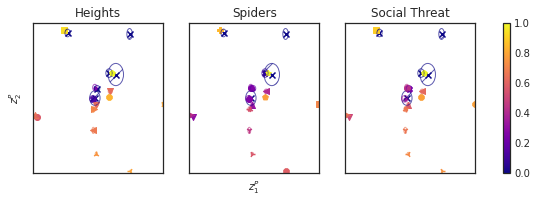

In [35]:
dtfa.heatmap_subject_embedding(heatmaps=[heights_fear_labeler, spiders_fear_labeler, social_threat_fear_labeler],
                               titles=['Heights', 'Spiders', 'Social Threat'], colormap='plasma', filename='affvids_norest_subject_heatmap.pdf')

In [36]:
### this is still Work in Progress ###
hyperparams = dtfa.variational.hyperparams.state_vardict()
all_weights = hyperparams['weights']['mu'].data.numpy()
all_factor_centers = hyperparams['factor_centers']['mu'].data.numpy()
all_factor_widths = np.exp(hyperparams['factor_log_widths']['mu'].data.numpy())
spider_matrix = []
social_matrix = []
heights_matrix = []
for i in range(dtfa.num_blocks):
    if block_task_labeler(dtfa._dataset.blocks[i]) == 'Spiders':
        spider_matrix.append(np.corrcoef(all_weights[i,:,:].T))
    elif  block_task_labeler(dtfa._dataset.blocks[i]) == 'Social threat':
        social_matrix.append(np.corrcoef(all_weights[i,:,:].T))
    elif  block_task_labeler(dtfa._dataset.blocks[i]) == 'Heights':
        heights_matrix.append(np.corrcoef(all_weights[i,:,:].T))
spider_matrix = (np.array(spider_matrix))
social_matrix = (np.array(social_matrix))
heights_matrix = (np.array(heights_matrix))

spider_matrix[spider_matrix < 0] = 0
social_matrix[social_matrix < 0] = 0
heights_matrix[heights_matrix < 0] = 0

spider_vectors = np.zeros(shape=(spider_matrix.shape[0],4950))
for i in range(spider_matrix.shape[0]):
    spider_vectors[i,:] = distance.squareform(spider_matrix[i,:,:],checks=False)

social_vectors = np.zeros(shape=(social_matrix.shape[0],4950))
for i in range(social_matrix.shape[0]):
    social_vectors[i,:] = distance.squareform(social_matrix[i,:,:],checks=False)
    
heights_vectors = np.zeros(shape=(heights_matrix.shape[0],4950))
for i in range(heights_matrix.shape[0]):
    heights_vectors[i,:] = distance.squareform(heights_matrix[i,:,:],checks=False)
    
spider_vectors_mean = spider_vectors.mean(0)
spider_vectors_std = spider_vectors.std(0)
social_vectors_mean = social_vectors.mean(0)
social_vectors_std = social_vectors.std(0)
heights_vectors_mean = heights_vectors.mean(0)
heights_vectors_std = heights_vectors.std(0)

In [37]:
heights_vectors.shape

(236, 4950)

In [38]:
### heights vs others ###
other_vectors = np.vstack((spider_vectors,social_vectors))
other_vectors_mean = other_vectors.mean(0)
other_vectors_std = other_vectors.std(0)
significance_flags = np.zeros(4950,)
p_original = []
t_original = []
for i in range(4950):
    t,p = stats.ttest_ind(heights_vectors[:,i],other_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
heights_connectome = distance.squareform(heights_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(heights_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                           colorbar=True,title='heights-others-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [39]:
### spiders vs others ###
other_vectors = np.vstack((heights_vectors,social_vectors))
other_vectors_mean = other_vectors.mean(0)
other_vectors_std = other_vectors.std(0)
significance_flags = np.zeros(4950,)
p_original = []
t_original = []
for i in range(4950):
    t,p = stats.ttest_ind(spider_vectors[:,i],other_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
spider_connectome = distance.squareform(spider_vectors_mean) * significance_flags
if significant_edges > 0:
    niplot.plot_connectome(spider_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='spiders-others-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [40]:
### social vs others ###
other_vectors = np.vstack((heights_vectors,spider_vectors))
other_vectors_mean = other_vectors.mean(0)
other_vectors_std = other_vectors.std(0)
significance_flags = np.zeros(4950,)
p_original = []
t_original = []
for i in range(4950):
    t,p = stats.ttest_ind(social_vectors[:,i],other_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
social_connectome = distance.squareform(social_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(social_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                           colorbar=True,title='social-others-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [41]:
### spider vs social ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(spider_vectors[:,i],social_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
spider_connectome = distance.squareform(spider_vectors_mean) * significance_flags
if significant_edges > 0:
    niplot.plot_connectome(spider_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='spider-social-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [42]:
### social vs spider ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(spider_vectors[:,i],social_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]<0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
social_connectome = distance.squareform(social_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(social_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='social-spider-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [43]:
### heights vs social ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(heights_vectors[:,i],social_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
heights_connectome = distance.squareform(heights_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(heights_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='heights-social-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [44]:
### social vs heights ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(heights_vectors[:,i],social_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]<0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
social_connectome = distance.squareform(social_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(social_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='social-heights-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [45]:
### heights vs spiders ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(heights_vectors[:,i],spider_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]>0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
heights_connectome = distance.squareform(heights_vectors_mean) * (significance_flags)
if significant_edges > 0:
    niplot.plot_connectome(heights_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='heights-spider-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [46]:
### spiders vs heights ###
p_original = []
t_original = []
significance_flags = np.zeros(4950,)
for i in range(4950):
    t,p = stats.ttest_ind(heights_vectors[:,i],spider_vectors[:,i],)
    p_original.append(p)
    t_original.append(t)
p_corrected = smt.multipletests(p_original,method='fdr_by')[1]
for i in range(4950):
    if p_corrected[i] < 0.05 and t_original[i]<0:
        significance_flags[i] = 1
significant_edges = significance_flags.sum()
significance_flags =distance.squareform(significance_flags)
use_factors = np.where(significance_flags.sum(0) > 0)[0]
node_sizes = np.zeros(100,)
node_sizes[use_factors] = all_factor_widths[0,use_factors]
spider_connectome = distance.squareform(spider_vectors_mean) * significance_flags
if significant_edges > 0:
    niplot.plot_connectome(spider_connectome,all_factor_centers[0,:,:],node_size=node_sizes,
                       colorbar=True,title='spider-heights-'+str(significant_edges))#,edge_threshold="75%")
else:
    print('no significant edges found')

no significant edges found


In [47]:
def subject_block_labeler(block):
    return subject_labeler(block['subject'])

In [49]:
### task classification using leave one out runs ###
from sklearn.svm import SVC
classifier = SVC(C=1., kernel="linear")

# A classifier to set the chance level
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier()

# Make a data splitting object for cross validation
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score
cv = LeaveOneGroupOut()

for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        block = dtfa._dataset.blocks[i]
        if block['subject'] == s:
            session_labels.append(block['run'])
            data.append(all_weights[i,:,:].mean(0))
            targets.append(task_labeler(block['task']))
    data = np.array(data)
    categories = np.unique(targets)

    for category in categories:
        print("Processing %s" % (category))
        classification_target = [t==category for t in targets]
        result = cross_val_score(
            classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
    #         scoring="roc_auc",
        )

        result_chance = cross_val_score(
            dummy_classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
    #         scoring="roc_auc",
        )

        print("Scores: %1.2f +- %1.2f" % (
            result.mean(),
            result.std()))

        print("Chance Scores: %1.2f +- %1.2f" % (
            result_chance.mean(),
            result_chance.std()))
        
    print ("\n")

Processing Subject 10
Processing Heights
Scores: 0.86 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.89 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.94 +- 0.04
Chance Scores: 0.67 +- 0.00


Processing Subject 11
Processing Heights
Scores: 0.83 +- 0.12
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.86 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.72 +- 0.08
Chance Scores: 0.67 +- 0.00


Processing Subject 12
Processing Heights
Scores: 0.56 +- 0.17
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.53 +- 0.10
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.56 +- 0.10
Chance Scores: 0.67 +- 0.00


Processing Subject 13
Processing Heights
Scores: 0.78 +- 0.17
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.92 +- 0.07
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.81 +- 0.10
Chance Scores: 0.67 +- 0.00


Processing Subject 14
Processing Heights
Scores: 0.79 +- 0.04
Ch

In [50]:
data = all_weights.mean(1)
targets = []
subject_labels = []
session_labels = []
for i in range(dtfa.num_blocks):
    block = dtfa._dataset.blocks[i]
    session_labels.append(block['run'])
    targets.append(task_labeler(block['task']))
    subject_labels.append(block['subject'])
categories = np.unique(targets)
for category in categories:
    print("Processing %s" % (category))
    classification_target = [t==category for t in targets]
    result = cross_val_score(
        classifier,
        data,
        classification_target,
        cv=cv,
        groups=subject_labels,
#         scoring="roc_auc",
    )

    result_chance = cross_val_score(
        dummy_classifier,
        data,
        classification_target,
        cv=cv,
        groups=subject_labels,
#         scoring="roc_auc",
    )

    print("Scores: %1.2f +- %1.2f" % (
        result.mean(),
        result.std()))

    print("Chance Scores: %1.2f +- %1.2f" % (
        result_chance.mean(),
        result_chance.std()))

Processing Heights
Scores: 0.67 +- 0.11
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.68 +- 0.12
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.70 +- 0.12
Chance Scores: 0.67 +- 0.00


In [52]:
from sklearn.feature_selection import SelectPercentile, f_classif
feature_selection = SelectPercentile(f_classif, percentile=5)
from sklearn.pipeline import Pipeline
svc = SVC(C=1., kernel="linear")
classifier = Pipeline([('anova', feature_selection), ('svc', svc)])
data = all_weights.mean(1)
targets = []
subject_labels = []
session_labels = []
data = []
for i in range(dtfa.num_blocks):
    block = dtfa._dataset.blocks[i]
    session_labels.append(block['run'])
    targets.append(task_labeler(block['task']))
    data.append(dtfa._dataset[i]['activations'].numpy().mean(0))
    subject_labels.append(block['subject'])
categories = np.unique(targets)
for category in categories:
    print("Processing %s" % (category))
    classification_target = [t==category for t in targets]
    result = cross_val_score(
        classifier,
        data,
        classification_target,
        cv=cv,
        groups=subject_labels,
#         scoring="roc_auc",
    )

    result_chance = cross_val_score(
        dummy_classifier,
        data,
        classification_target,
        cv=cv,
        groups=subject_labels,
#         scoring="roc_auc",
    )

    print("Scores: %1.2f +- %1.2f" % (
        result.mean(),
        result.std()))

    print("Chance Scores: %1.2f +- %1.2f" % (
        result_chance.mean(),
        result_chance.std()))

Processing Heights
Scores: 0.71 +- 0.02
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.68 +- 0.02
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


In [53]:
for s in dtfa.subjects():
    print("Processing Subject %d" % (s))
    session_labels = []
    data = []
    targets = []
    for i in range(dtfa.num_blocks):
        block = dtfa._dataset.blocks[i]
        if block['subject'] == s:
            session_labels.append(block['run'])
            data.append(dtfa._dataset[i]['activations'].data.numpy().mean(0))
            targets.append(task_labeler(block['task']))
    data = np.array(data)
    categories = np.unique(targets)

    for category in categories:
        print("Processing %s" % (category))
        classification_target = [t==category for t in targets]
        result = cross_val_score(
            classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
    #         scoring="roc_auc",
        )

        result_chance = cross_val_score(
            dummy_classifier,
            data,
            classification_target,
            cv=cv,
            groups=session_labels,
    #         scoring="roc_auc",
        )

        print("Scores: %1.2f +- %1.2f" % (
            result.mean(),
            result.std()))

        print("Chance Scores: %1.2f +- %1.2f" % (
            result_chance.mean(),
            result_chance.std()))
        
    print ("\n")

Processing Subject 10
Processing Heights
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


Processing Subject 11
Processing Heights
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


Processing Subject 12
Processing Heights
Scores: 0.64 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [34827] are constant.
  UserWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [32758 34827 76300] are constant.
  UserWarning)


Scores: 0.61 +- 0.08
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


Processing Subject 13
Processing Heights
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [68225] are constant.
  UserWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [34827] are constant.
  UserWarning)


Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.64 +- 0.04
Chance Scores: 0.67 +- 0.00


Processing Subject 14


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [34827 68225] are constant.
  UserWarning)


Processing Heights
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.62 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Spiders


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [68225] are constant.
  UserWarning)


Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


Processing Subject 15
Processing Heights
Scores: 0.72 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [9685] are constant.
  UserWarning)


Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


Processing Subject 16


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [62778] are constant.
  UserWarning)


Processing Heights
Scores: 0.64 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [34827] are constant.
  UserWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [68225] are constant.
  UserWarning)


Scores: 0.64 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


Processing Subject 17
Processing Heights
Scores: 0.64 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Spiders


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [34827] are constant.
  UserWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [34827] are constant.
  UserWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [34827] are constant.
  UserWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [34827] are constant.
  UserWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [68225] are constant.
  UserWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection

Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


Processing Subject 18
Processing Heights
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


Processing Subject 19


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [79633] are constant.
  UserWarning)


Processing Heights
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [32758 34827] are constant.
  UserWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [68225] are constant.
  UserWarning)


Scores: 0.58 +- 0.12
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.64 +- 0.04
Chance Scores: 0.67 +- 0.00


Processing Subject 23


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [34827 68225] are constant.
  UserWarning)


Processing Heights
Scores: 0.71 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Spiders


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [80287] are constant.
  UserWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [62778] are constant.
  UserWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [68225] are constant.
  UserWarning)


Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


Processing Subject 25
Processing Heights
Scores: 0.72 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [15038 62778 63515] are constant.
  UserWarning)


Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


Processing Subject 26


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [ 9685 15038 62778 63515] are constant.
  UserWarning)


Processing Heights
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.58 +- 0.08
Chance Scores: 0.67 +- 0.00
Processing Spiders


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [68225] are constant.
  UserWarning)


Scores: 0.62 +- 0.04
Chance Scores: 0.67 +- 0.00


Processing Subject 28
Processing Heights
Scores: 0.72 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [62778] are constant.
  UserWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [57687] are constant.
  UserWarning)


Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


Processing Subject 29


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [57687] are constant.
  UserWarning)


Processing Heights
Scores: 0.61 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.64 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


Processing Subject 4
Processing Heights
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.56 +- 0.16
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.64 +- 0.04
Chance Scores: 0.67 +- 0.00


Processing Subject 5
Processing Heights
Scores: 0.72 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.61 +- 0.08
Chance Scores: 0.67 +- 0.00


Processing Subject 6
Processing Heights
Scores: 0.72 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


Processing Subject 7
Processing Heights
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [  261   551  1184  1208  1477  1478  1500  2339  2783  3103  3542  4529
  5157  5368  5661  6136  7129  9088 10354 11029 11087 11158 11534 11570
 11853 15517 16666 16695 17531 17574 17591 18460 20034 21010 21918 22130
 22974 24007 26302 27457 27936 28139 28612 30156 32087 32113 33509 34830
 35505 36686 38178 38330 39472 40165 41413 42278 43363 44189 44447 45435
 45927 46720 47509 48015 48602 49370 49515 50286 50888 52576 52606 54403
 55936 56238 56975 57049 57910 58433 58586 60094 60134 60800 60811 61148
 64539 65450 65931 66323 66683 66893 68373 68686 68899 68975 69097 69743
 69964 70770 71249 71429 72885 73150 74307 74325 74649 75448 75822 76300
 76971 77702 78689 78914 79146 79193 79579 81092 81246] are constant.
  UserWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115

Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


Processing Subject 8
Processing Heights
Scores: 0.64 +- 0.10
Chance Scores: 0.67 +- 0.00
Processing Social threat


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [51692 63515] are constant.
  UserWarning)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [31126] are constant.
  UserWarning)


Scores: 0.56 +- 0.16
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


Processing Subject 9


/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [9685] are constant.
  UserWarning)


Processing Heights
Scores: 0.72 +- 0.04
Chance Scores: 0.67 +- 0.00
Processing Social threat
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00
Processing Spiders
Scores: 0.67 +- 0.00
Chance Scores: 0.67 +- 0.00


